## 分群 (Clustering)

* 為一種非監督式學習 => 訓練資料沒有預先定義的標籤
* 目的在於找出資料中相似的幾個群聚，在同一個子集中的成員對象都有相似的一些屬性

#### make_blobs

* 根據使用者指定的特徵數量、中心點數量、範圍等參數生成一個N類資料集和對應標籤

* sklearn.datasets.make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)

參數|說明
------|------
n_samples|待生成的樣本總數
n_features|每個樣本的特徵數
centers|類別數
cluster_std|每個類別的方差
center_box|中心確定之後的資料邊界，default value : (-10.0, 10.0)
shuffle | 打亂 default value : True
random_state | 相同的值重覆機率


In [1]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=100,n_features=2,centers=4,cluster_std=1,center_box=(-10.0,10.0),shuffle=True,random_state=None)

In [2]:
X

array([[ 6.75770244e+00, -2.80719832e-01],
       [ 9.39368866e-02, -9.50985044e+00],
       [ 2.23252804e+00, -1.06436970e+01],
       [ 4.73707549e+00,  5.14789486e-01],
       [ 4.80772359e+00,  2.12473406e+00],
       [ 2.34006790e+00, -9.97060733e+00],
       [ 1.01120201e+00, -9.38133916e+00],
       [ 3.55507972e+00,  8.52481762e-01],
       [ 1.56270794e+00, -1.02641666e+01],
       [-2.31765911e+00,  4.99153023e+00],
       [ 8.90911338e-01,  8.77427405e+00],
       [ 1.84124565e+00,  6.84045366e+00],
       [-1.87753209e+00,  4.14179005e+00],
       [-1.05328117e+00,  4.87493820e+00],
       [ 6.57213962e+00,  2.98162321e-01],
       [ 4.18923924e-01,  5.18602009e+00],
       [-2.87864743e+00,  5.90856454e+00],
       [-1.57080497e+00, -1.17075979e+01],
       [-6.81508772e-01,  5.80504318e+00],
       [ 3.72509130e+00, -4.05637444e-01],
       [ 6.50885706e+00,  3.26833726e-02],
       [ 4.38859585e+00, -2.19629800e+00],
       [ 8.14063774e-02,  6.65116836e+00],
       [ 5.

In [3]:
y

array([2, 0, 0, 2, 2, 0, 0, 2, 0, 1, 3, 3, 1, 1, 2, 1, 1, 0, 3, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 2, 0, 3, 0, 0, 2, 3, 3, 0, 1, 2, 1, 2, 2, 0, 3,
       2, 3, 3, 1, 2, 1, 1, 1, 0, 0, 3, 3, 2, 1, 1, 1, 3, 2, 1, 1, 3, 0,
       2, 0, 1, 2, 0, 3, 3, 0, 0, 1, 1, 2, 3, 0, 2, 2, 1, 0, 3, 0, 1, 2,
       0, 0, 1, 1, 2, 1, 2, 0, 3, 3, 1, 0])

In [4]:
import matplotlib.pyplot as plt

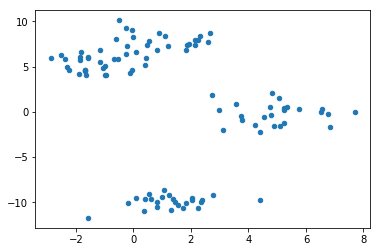

In [5]:
plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1], s=20, marker='o')

### K平均演算法 (K-means algorithm)

* 把n個點劃分到k個聚類中，使每個點都有屬於一個離它最近的均值(聚類中心)對應的聚類 (利用向量距離來做聚類)，以作為分群的標準
* 已知觀測集(x1,x2,...,xn)，其中每個觀測都是一個d-維實向量，k-平均聚類要把這n個觀測劃分到k個集合中(k≤n),使得組內平方和（WCSS within-cluster sum of squares）最小

#### Scikit-learn K-Means
sklearn.cluster.KMeans(n_clusters=8, init=’k-means++’, n_init=10, max_iter=300, tol=0.0001, precompute_distances=’auto’, verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm=’auto’)

參數 | 說明
------|------
n_clusters |聚類中心數量, default : 8
init | 'k-means++   <br>'random':隨機選擇K個instance做為中心 <br>ndarray : 如傳入為矩陣（ndarray），則將該矩陣的每一行作為聚類中心
n_init |隨機運行的次數 default: 10
max_iter |運行的最大迭代次數 default: 300
tol | 容忍的最小誤差,誤差小於tol則退出迭代 default: 1e-4
precompute_distances | 是否將資料全載入到記憶體內計算，可選{'auto', True, False}
n_jobs| 同時進行運算的核数
verbose|是否輸出詳細訊息,default : 0 
random_state|用於隨機產生中心的隨機序列
copy_x|是否將資料複製一份進行運算
algorithm |距離計算方式，可選{"auto", "full" or "elkan",default="auto"}<br>full : 傳統距離計算公式 <br> elkan : 使用三角不等式 <br> auto : 為稀疏矩陣時使用full，否則使用elkan

方法|說明
------|------
fit（X）|進行訓練
predict(X) | 進行新數據類別的預測


In [6]:
from sklearn.cluster import KMeans

n_clusters = 3

kmean = KMeans(n_clusters=n_clusters) 

kmean.fit(X) #進行訓練
#kmean.fit_predict(X) # 先對X進行訓練並預測X中每個實例(instance)的類別


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
print("k={}, cost ={}".format(n_clusters,int(kmean.score(X)))) #計算誤差

k=3, cost =-350


In [8]:
labers = kmean.labels_ 
centers = kmean.cluster_centers_
markers = ['o','^','*']
colors = ['r','b','y']
print(X[labers])

[[  2.23252804 -10.64369701]
 [  6.75770244  -0.28071983]
 [  6.75770244  -0.28071983]
 [  2.23252804 -10.64369701]
 [  2.23252804 -10.64369701]
 [  6.75770244  -0.28071983]
 [  6.75770244  -0.28071983]
 [  2.23252804 -10.64369701]
 [  6.75770244  -0.28071983]
 [  0.09393689  -9.50985044]
 [  0.09393689  -9.50985044]
 [  0.09393689  -9.50985044]
 [  0.09393689  -9.50985044]
 [  0.09393689  -9.50985044]
 [  2.23252804 -10.64369701]
 [  0.09393689  -9.50985044]
 [  0.09393689  -9.50985044]
 [  6.75770244  -0.28071983]
 [  0.09393689  -9.50985044]
 [  2.23252804 -10.64369701]
 [  2.23252804 -10.64369701]
 [  2.23252804 -10.64369701]
 [  0.09393689  -9.50985044]
 [  0.09393689  -9.50985044]
 [  0.09393689  -9.50985044]
 [  0.09393689  -9.50985044]
 [  0.09393689  -9.50985044]
 [  0.09393689  -9.50985044]
 [  2.23252804 -10.64369701]
 [  6.75770244  -0.28071983]
 [  0.09393689  -9.50985044]
 [  6.75770244  -0.28071983]
 [  6.75770244  -0.28071983]
 [  2.23252804 -10.64369701]
 [  0.09393689

In [9]:
# 輸出中心點位置
print(centers)

[[ 1.30727857 -9.92081791]
 [-0.26861642  6.46480194]
 [ 4.94212995 -0.21460934]]


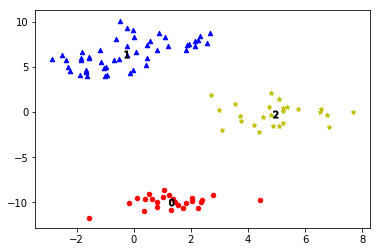

In [10]:
# 視覺化呈現

plt.figure(figsize=(6,4))

for c in range(n_clusters):
    cluster = X[labers == c]
    plt.scatter(cluster[:,0],cluster[:,1],marker=markers[c],s=20,c=colors[c])

#輸出中心點
for i,c in enumerate(centers):
    plt.scatter(c[0],c[1],marker ='$%d$' % i, s=50, c='black')
    

In [11]:
#對新數據進行預測
print(kmean.predict([[10, 7]]))

[2]


### K-MEANS 文本分群 

安裝套件
* pip3 install xlrd
* pip3 install jieba

In [12]:
import pandas
newsdf = pandas.read_excel('news2.xlsx')

In [13]:
newsdf.head()

,title,summary
0,菊勸退賴 新系立委卻這麼想…賴出線 有利立委選舉,行政院前院長賴清德角逐民進黨總統初選，賴清德所屬新潮流系前天開會因應，總統府秘書長陳菊也與會...
1,健保砍價外資藥廠爆退藥潮 製藥公會：本土藥廠可供應,繼百憂解之後，20日再傳治療革蘭氏陰性菌的最後一線用藥泰寧，亦將退出台灣市場；製藥同業公會蘇...
2,波音737 MAX機瘟 美媒：FBI介入刑事調查,美國「西雅圖時報」（The Seattle Times）20日引述知情人士報導，美國聯邦調查...
3,周玉蔻罵警像流氓和解 判拘役30天緩刑2年定讞,媒體人周玉蔻在政論節目指一名來賓（員警）說話「像流氓」，一審法院判周玉蔻拘役50天得易科罰金...
4,南山片面更改收費方式造成保戶權益受損 金管會4月開罰,南山人壽大砍收費員，在未經客戶同意之下片面變更保費收費方式，造成200多件保單停效、2000...


In [14]:
import jieba

title_ary = []
article_ary = []

for news in newsdf.iterrows():
    print(news[1])
    article_ary.append(' '.join(jieba.cut(news[1].summary)))
    title_ary.append(news[1].title)

Building prefix dict from the default dictionary ...


title                               菊勸退賴 新系立委卻這麼想…賴出線 有利立委選舉
summary    行政院前院長賴清德角逐民進黨總統初選，賴清德所屬新潮流系前天開會因應，總統府秘書長陳菊也與會...
Name: 0, dtype: object


Dumping model to file cache /tmp/jieba.cache
Loading model cost 2.243 seconds.
Prefix dict has been built succesfully.


title                              健保砍價外資藥廠爆退藥潮 製藥公會：本土藥廠可供應
summary    繼百憂解之後，20日再傳治療革蘭氏陰性菌的最後一線用藥泰寧，亦將退出台灣市場；製藥同業公會蘇...
Name: 1, dtype: object
title                               波音737 MAX機瘟 美媒：FBI介入刑事調查
summary    美國「西雅圖時報」（The Seattle Times）20日引述知情人士報導，美國聯邦調查...
Name: 2, dtype: object
title                                周玉蔻罵警像流氓和解 判拘役30天緩刑2年定讞
summary    媒體人周玉蔻在政論節目指一名來賓（員警）說話「像流氓」，一審法院判周玉蔻拘役50天得易科罰金...
Name: 3, dtype: object
title                             南山片面更改收費方式造成保戶權益受損 金管會4月開罰
summary    南山人壽大砍收費員，在未經客戶同意之下片面變更保費收費方式，造成200多件保單停效、2000...
Name: 4, dtype: object
title                                  緬甸華僑入境情緒失控 攻擊檢疫犬打傷領犬員
summary    防堵非洲豬瘟疫情，機場的檢疫犬發揮了很大的功能，但是昨(19)日卻發生了一起入境旅客攻擊檢疫...
Name: 5, dtype: object
title                                      賴清德：若當台灣總統 拚經濟最重要
summary    行政院前院長賴清德周一登記參與民進黨總統初選，總統蔡英文預定今天赴民進黨登記初選，旋即出國拚...
Name: 6, dtype: object
title                            台中空品差！他貼盧秀燕轟中央遭網噓　引林佳龍留言網狂讚
summary    近日來中南部空品不佳，空汙嚴重，台中市長盧秀燕18日再度向中央開砲表示，「空汙最嚴重的地方降...
Name: 7,

In [15]:
from sklearn.feature_extraction.text import CountVectorizer  # feature_extraction.text 文本特徵提取
vectorizer = CountVectorizer() #詞語轉換成詞頻矩陣
X = vectorizer.fit_transform(article_ary) #計算各詞語出現次數

In [16]:
print(X)  # (文本序號,詞序號) 詞頻

  (0, 810)	1
  (0, 231)	1
  (0, 674)	1
  (0, 613)	1
  (0, 1394)	1
  (0, 1306)	1
  (0, 487)	1
  (0, 1304)	1
  (0, 1405)	1
  (0, 650)	1
  (0, 268)	1
  (0, 981)	1
  (0, 1458)	1
  (0, 1258)	1
  (0, 64)	1
  (0, 755)	1
  (0, 1253)	1
  (0, 1065)	1
  (0, 301)	1
  (0, 1395)	1
  (0, 677)	1
  (0, 1389)	1
  (0, 820)	1
  (0, 912)	1
  (0, 730)	2
  :	:
  (17, 1510)	1
  (17, 281)	1
  (17, 920)	1
  (17, 1316)	1
  (17, 1178)	5
  (17, 1375)	1
  (17, 1367)	1
  (17, 927)	1
  (17, 11)	1
  (17, 674)	12
  (17, 613)	1
  (17, 1395)	1
  (17, 827)	2
  (17, 533)	3
  (17, 438)	2
  (17, 1109)	1
  (17, 581)	2
  (17, 128)	2
  (17, 303)	1
  (17, 1236)	1
  (17, 1184)	1
  (17, 1226)	6
  (17, 127)	1
  (17, 678)	1
  (17, 1131)	1


In [17]:
feature_name = vectorizer.get_feature_names()
feature_name

['10',
 '106',
 '120',
 '13',
 '130',
 '132',
 '15',
 '157',
 '16',
 '18',
 '19',
 '20',
 '200',
 '2000',
 '2014',
 '2015',
 '2017',
 '2020',
 '2025',
 '21',
 '22',
 '25',
 '2861',
 '29',
 '30',
 '300',
 '3039',
 '3851',
 '40',
 '46',
 '50',
 '60',
 '61',
 '6715',
 '6724',
 '737',
 '75',
 '9764',
 'android',
 'app',
 'dagmawit',
 'dennis',
 'et302',
 'faa',
 'fbi',
 'fda',
 'gmp',
 'ipad',
 'iphone',
 'jon',
 'max',
 'mcas',
 'moges',
 'pic',
 'po',
 'ptt',
 'seattle',
 'store',
 'tajer',
 'tfda',
 'the',
 'times',
 'weaks',
 'x光',
 '一位',
 '一個',
 '一再',
 '一出',
 '一同',
 '一名',
 '一員',
 '一堆',
 '一場',
 '一天',
 '一定',
 '一審',
 '一年',
 '一度',
 '一手',
 '一時',
 '一樣',
 '一次',
 '一款',
 '一步',
 '一氣',
 '一直',
 '一起',
 '一遍',
 '一部',
 '一開始',
 '一項',
 '三贏',
 '上任',
 '上市',
 '上政論',
 '上架',
 '上節',
 '上訴',
 '上路',
 '下去',
 '下台',
 '下壓',
 '下架',
 '下次',
 '下跌',
 '不久',
 '不予',
 '不佳',
 '不便',
 '不停',
 '不利',
 '不到',
 '不可',
 '不大',
 '不好',
 '不如',
 '不少',
 '不得',
 '不必',
 '不悅',
 '不承認',
 '不敢',
 '不是',
 '不會',
 '不滿',
 '不用',
 '不管',
 '不能',
 '不要',
 '不見

In [18]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarities = cosine_similarity(X,X)

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 123)
y_kmeans = kmeans.fit_predict(cosine_similarities)

In [24]:
import numpy 
from collections import Counter
title_npary = numpy.array(title_ary)
Counter(y_kmeans)

y_kmeans

array([3, 4, 1, 0, 7, 2, 3, 5, 2, 1, 0, 4, 2, 0, 5, 1, 6, 6], dtype=int32)

In [26]:
for i in range(0,8):
    print("cluste -",i)
    print("-----------------")
    for ele in title_npary[y_kmeans == i]:    
        print(i," ",ele)
    print("-----------------")

cluste - 0
-----------------
0   周玉蔻罵警像流氓和解 判拘役30天緩刑2年定讞
0   罵退休警「流氓、黑道」 周玉蔻賠15萬獲緩刑
0   上節目罵警察 蔻蔻姊賠15萬獲緩刑
-----------------
cluste - 1
-----------------
1   波音737 MAX機瘟 美媒：FBI介入刑事調查
1   波音737 MAX 8失事黑盒子曝光　與獅航空難「非常相似」
1   美媒揭露：駕駛波音737 MAX　只要上1小時iPad課程
-----------------
cluste - 2
-----------------
2   緬甸華僑入境情緒失控 攻擊檢疫犬打傷領犬員
2   不滿檢疫犬嗅行李 旅客用推車撞狗打人遭送辦
2   「護國神犬」遭施暴 緬甸華僑推車撞檢疫犬
-----------------
cluste - 3
-----------------
3   菊勸退賴 新系立委卻這麼想…賴出線 有利立委選舉
3   賴清德：若當台灣總統 拚經濟最重要
-----------------
cluste - 4
-----------------
4   健保砍價外資藥廠爆退藥潮 製藥公會：本土藥廠可供應
4   健保砍藥價，傷的是台廠、不是原廠！
-----------------
cluste - 5
-----------------
5   台中空品差！他貼盧秀燕轟中央遭網噓　引林佳龍留言網狂讚
5   空汙Bang不見？檢舉空汙App疑下架　台中市府闢謠
-----------------
cluste - 6
-----------------
6   空服工會反對設立罷工預告期 林佳龍今晚找勞團協商
6   長榮罷工醞釀中 空服工會籲林佳龍撤罷工預告制度
-----------------
cluste - 7
-----------------
7   南山片面更改收費方式造成保戶權益受損 金管會4月開罰
-----------------
